# <center> Customer Churn Prediction: Data Analytics and Machine Learning for Data-Driven Decision-Making

# 

#### Importing the libraries

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**Load the data**

In [125]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6901,2925-MXLSX,Female,0,No,No,30,Yes,Yes,DSL,No,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),68.95,2038.7,No
3045,9114-AAFQH,Female,0,Yes,No,48,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Electronic check,65.65,3094.65,No
6144,2322-VCZHZ,Male,1,Yes,No,23,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.00,2024.1,No
6722,5481-NTDOH,Female,1,Yes,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),107.05,7142.5,No
3369,4680-KUTAJ,Female,1,No,No,11,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,55.60,580.8,No


# 

## Data Cleaning

In [126]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 1. First of all, drop customerID column as it is of no use

In [127]:
df.drop('customerID',axis='columns',inplace=True)

In [128]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### 2. Total charges is Object it should be numeric so converting into numeric

In [129]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### It is string. So converting it to numbers

In [130]:
df["TotalCharges"] = pd.to_numeric(df.TotalCharges,errors='coerce')

In [131]:
df.TotalCharges.isnull().sum()

11

#### We have two option either drop these 11 row or put mean of the total charges

In [132]:
df = df.dropna(axis = 0)

In [133]:
df.shape

(7032, 20)

In [134]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [135]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

## 2. Exporatory Data Analysis

In [136]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [137]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

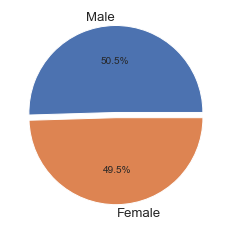

In [138]:
plt.pie([df.gender.value_counts()[0], df.gender.value_counts()[1]], labels = ['Male', 'Female'], autopct="%.1f%%", explode=[0.03]*2)
plt.show()

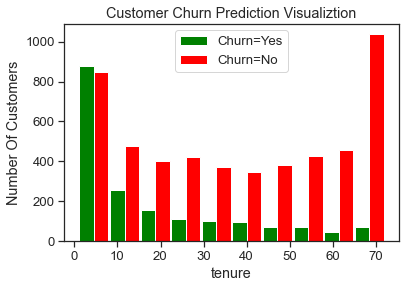

In [139]:
import matplotlib.pyplot as plt
import numpy as np
 
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


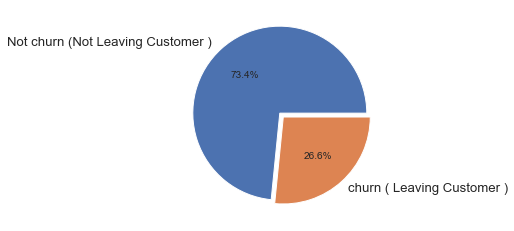

In [140]:
plt.pie([df.Churn.value_counts()[0], df.Churn.value_counts()[1]], labels = ['Not churn (Not Leaving Customer ) ', 'churn ( Leaving Customer )'], autopct="%.1f%%", explode=[0.03]*2)
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

In [ ]:
sn.countplot(x='gender', hue='Churn', data=df)
plt.show()

In [ ]:
df.SeniorCitizen.value_counts()

In [19]:
df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

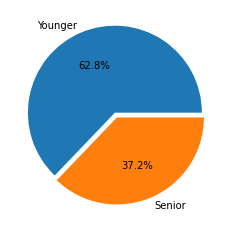

In [20]:
plt.pie([df.SeniorCitizen.value_counts()[0], df.gender.value_counts()[1]], labels = ['Younger', 'Senior'], autopct="%.1f%%", explode=[0.03]*2 
       )
plt.show()

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
contingency_table = pd.crosstab(df.SeniorCitizen, df.Churn)
contingency_table

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


In [23]:
contingency_table = pd.crosstab(df.Partner, df.Churn)
contingency_table

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


In [24]:
contingency_table = pd.crosstab(df.Dependents, df.Churn)
contingency_table

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


<AxesSubplot:xlabel='tenure', ylabel='Churn rate(%)'>

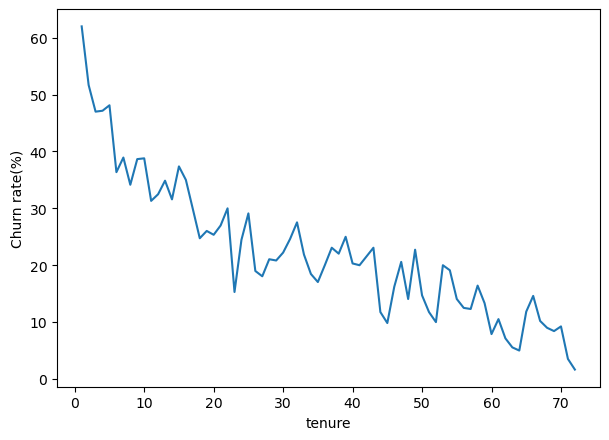

In [25]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

churn_rates_Yes = 100 * yes_churn/(no_churn+yes_churn)
plt.figure(figsize=(7,5),dpi=100)
plt.ylabel('Churn rate(%)')
churn_rates_Yes.iloc[0].plot()

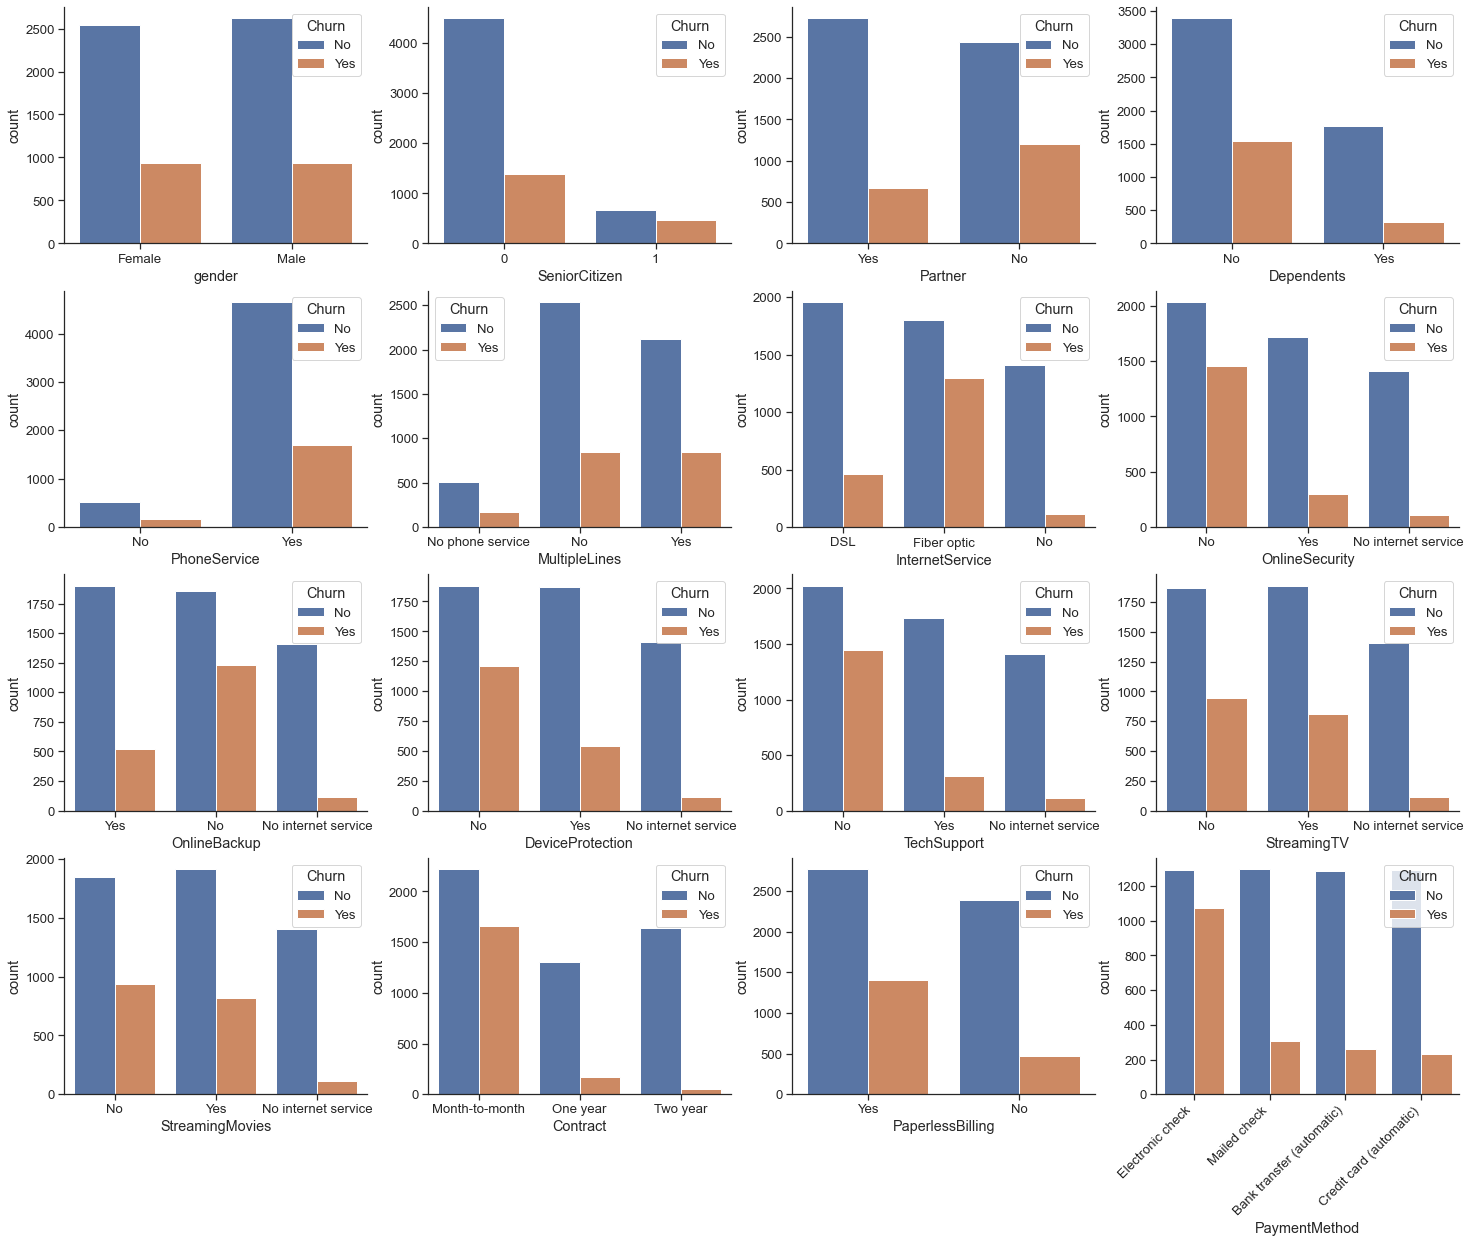

In [26]:
to_drop = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
columns_to_visualize = df.drop(to_drop, axis = 1)

plt.figure(figsize = (25, 20))
sn.set(font_scale = 1.2)
sn.set_style('ticks')

for i, column in enumerate(columns_to_visualize):
    plt.subplot(4, 4, i+1)
    sn.countplot(data = df, x = column, hue = 'Churn')
    
sn.despine()

plt.xticks(rotation=45, horizontalalignment='right');

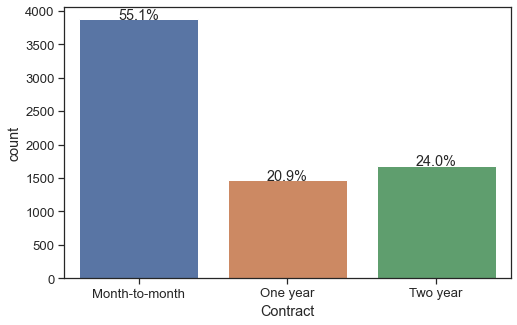

In [27]:
plt.figure(figsize=(8,5))
ax = sn.countplot(x='Contract', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df.Contract))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

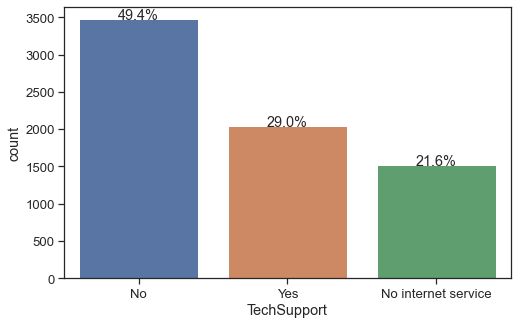

In [28]:
plt.figure(figsize=(8,5))
ax = sn.countplot(x='TechSupport', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df.Contract))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

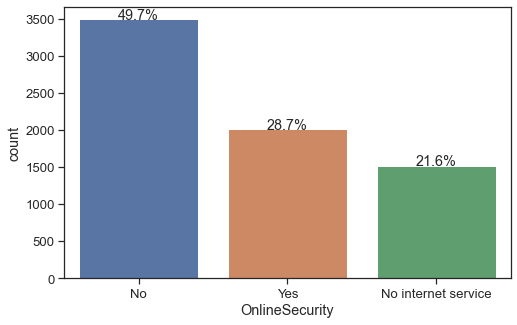

In [29]:
plt.figure(figsize=(8,5))
ax = sn.countplot(x='OnlineSecurity', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df.Contract))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

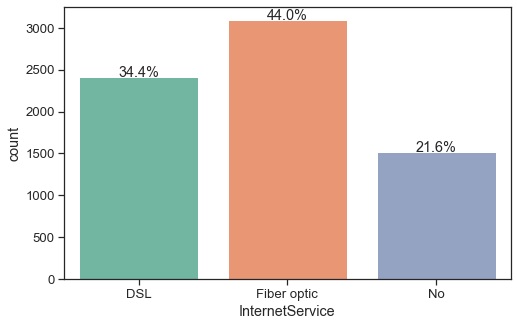

In [30]:
plt.figure(figsize=(8,5))
ax = sn.countplot(x='InternetService', data=df, palette='Set2')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df.Contract))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

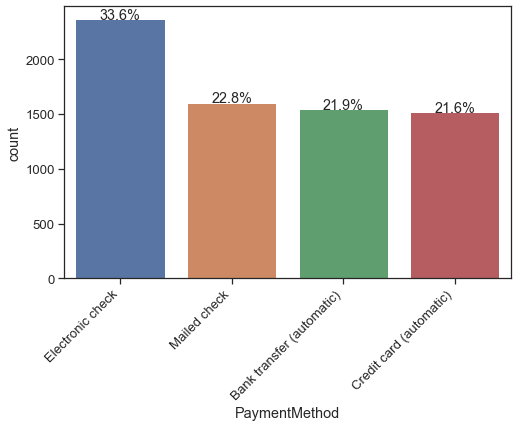

In [31]:
plt.figure(figsize=(8,5))
ax = sn.countplot(x='PaymentMethod', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df.Contract))
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xticks(rotation=45, horizontalalignment='right');
plt.show()


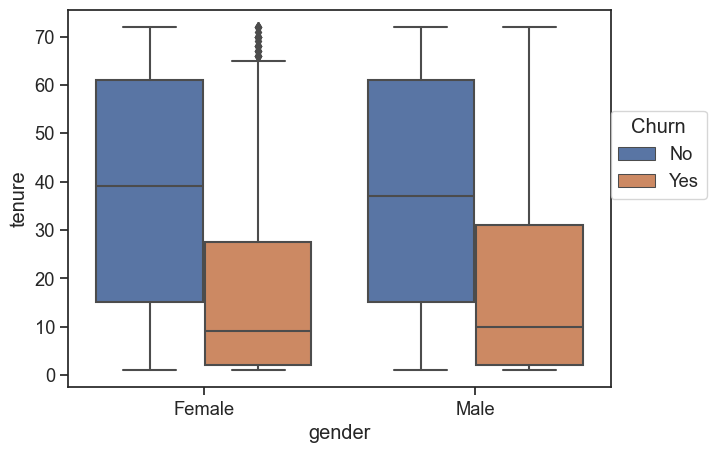

In [32]:
plt.figure(figsize=(7,5),dpi=100)
sn.boxplot(data=df,x='gender',y='tenure',hue='Churn')
plt.legend(loc=(1,0.5),title = "Churn")

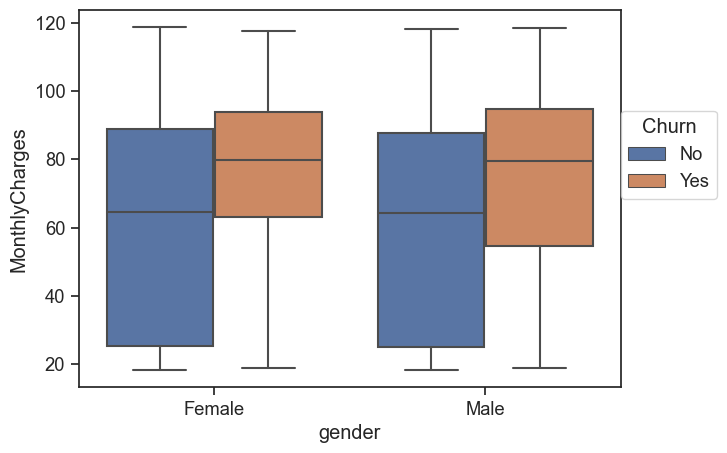

In [33]:
plt.figure(figsize=(7,5),dpi=100)
sn.boxplot(data=df,x='gender', y= 'MonthlyCharges',hue='Churn')
plt.legend(loc=(1,0.5),title = "Churn")

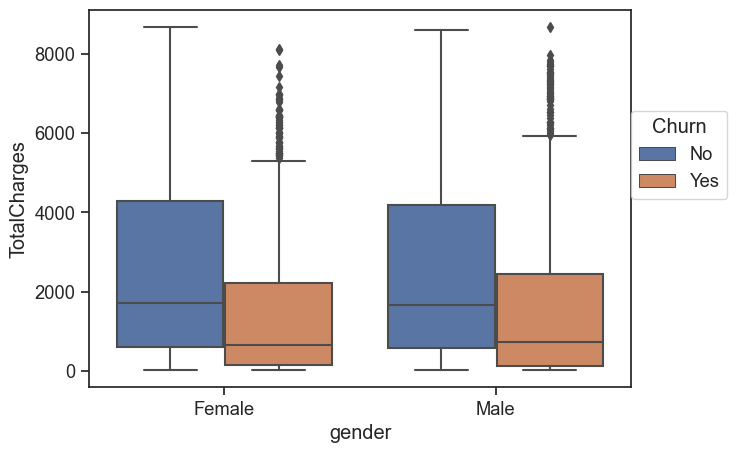

In [34]:
plt.figure(figsize=(7,5),dpi=100)
sn.boxplot(data=df,x='gender',y='TotalCharges',hue='Churn')
plt.legend(loc=(1,0.5),title = "Churn")

In [35]:
df_corr  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [36]:
df_corr['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

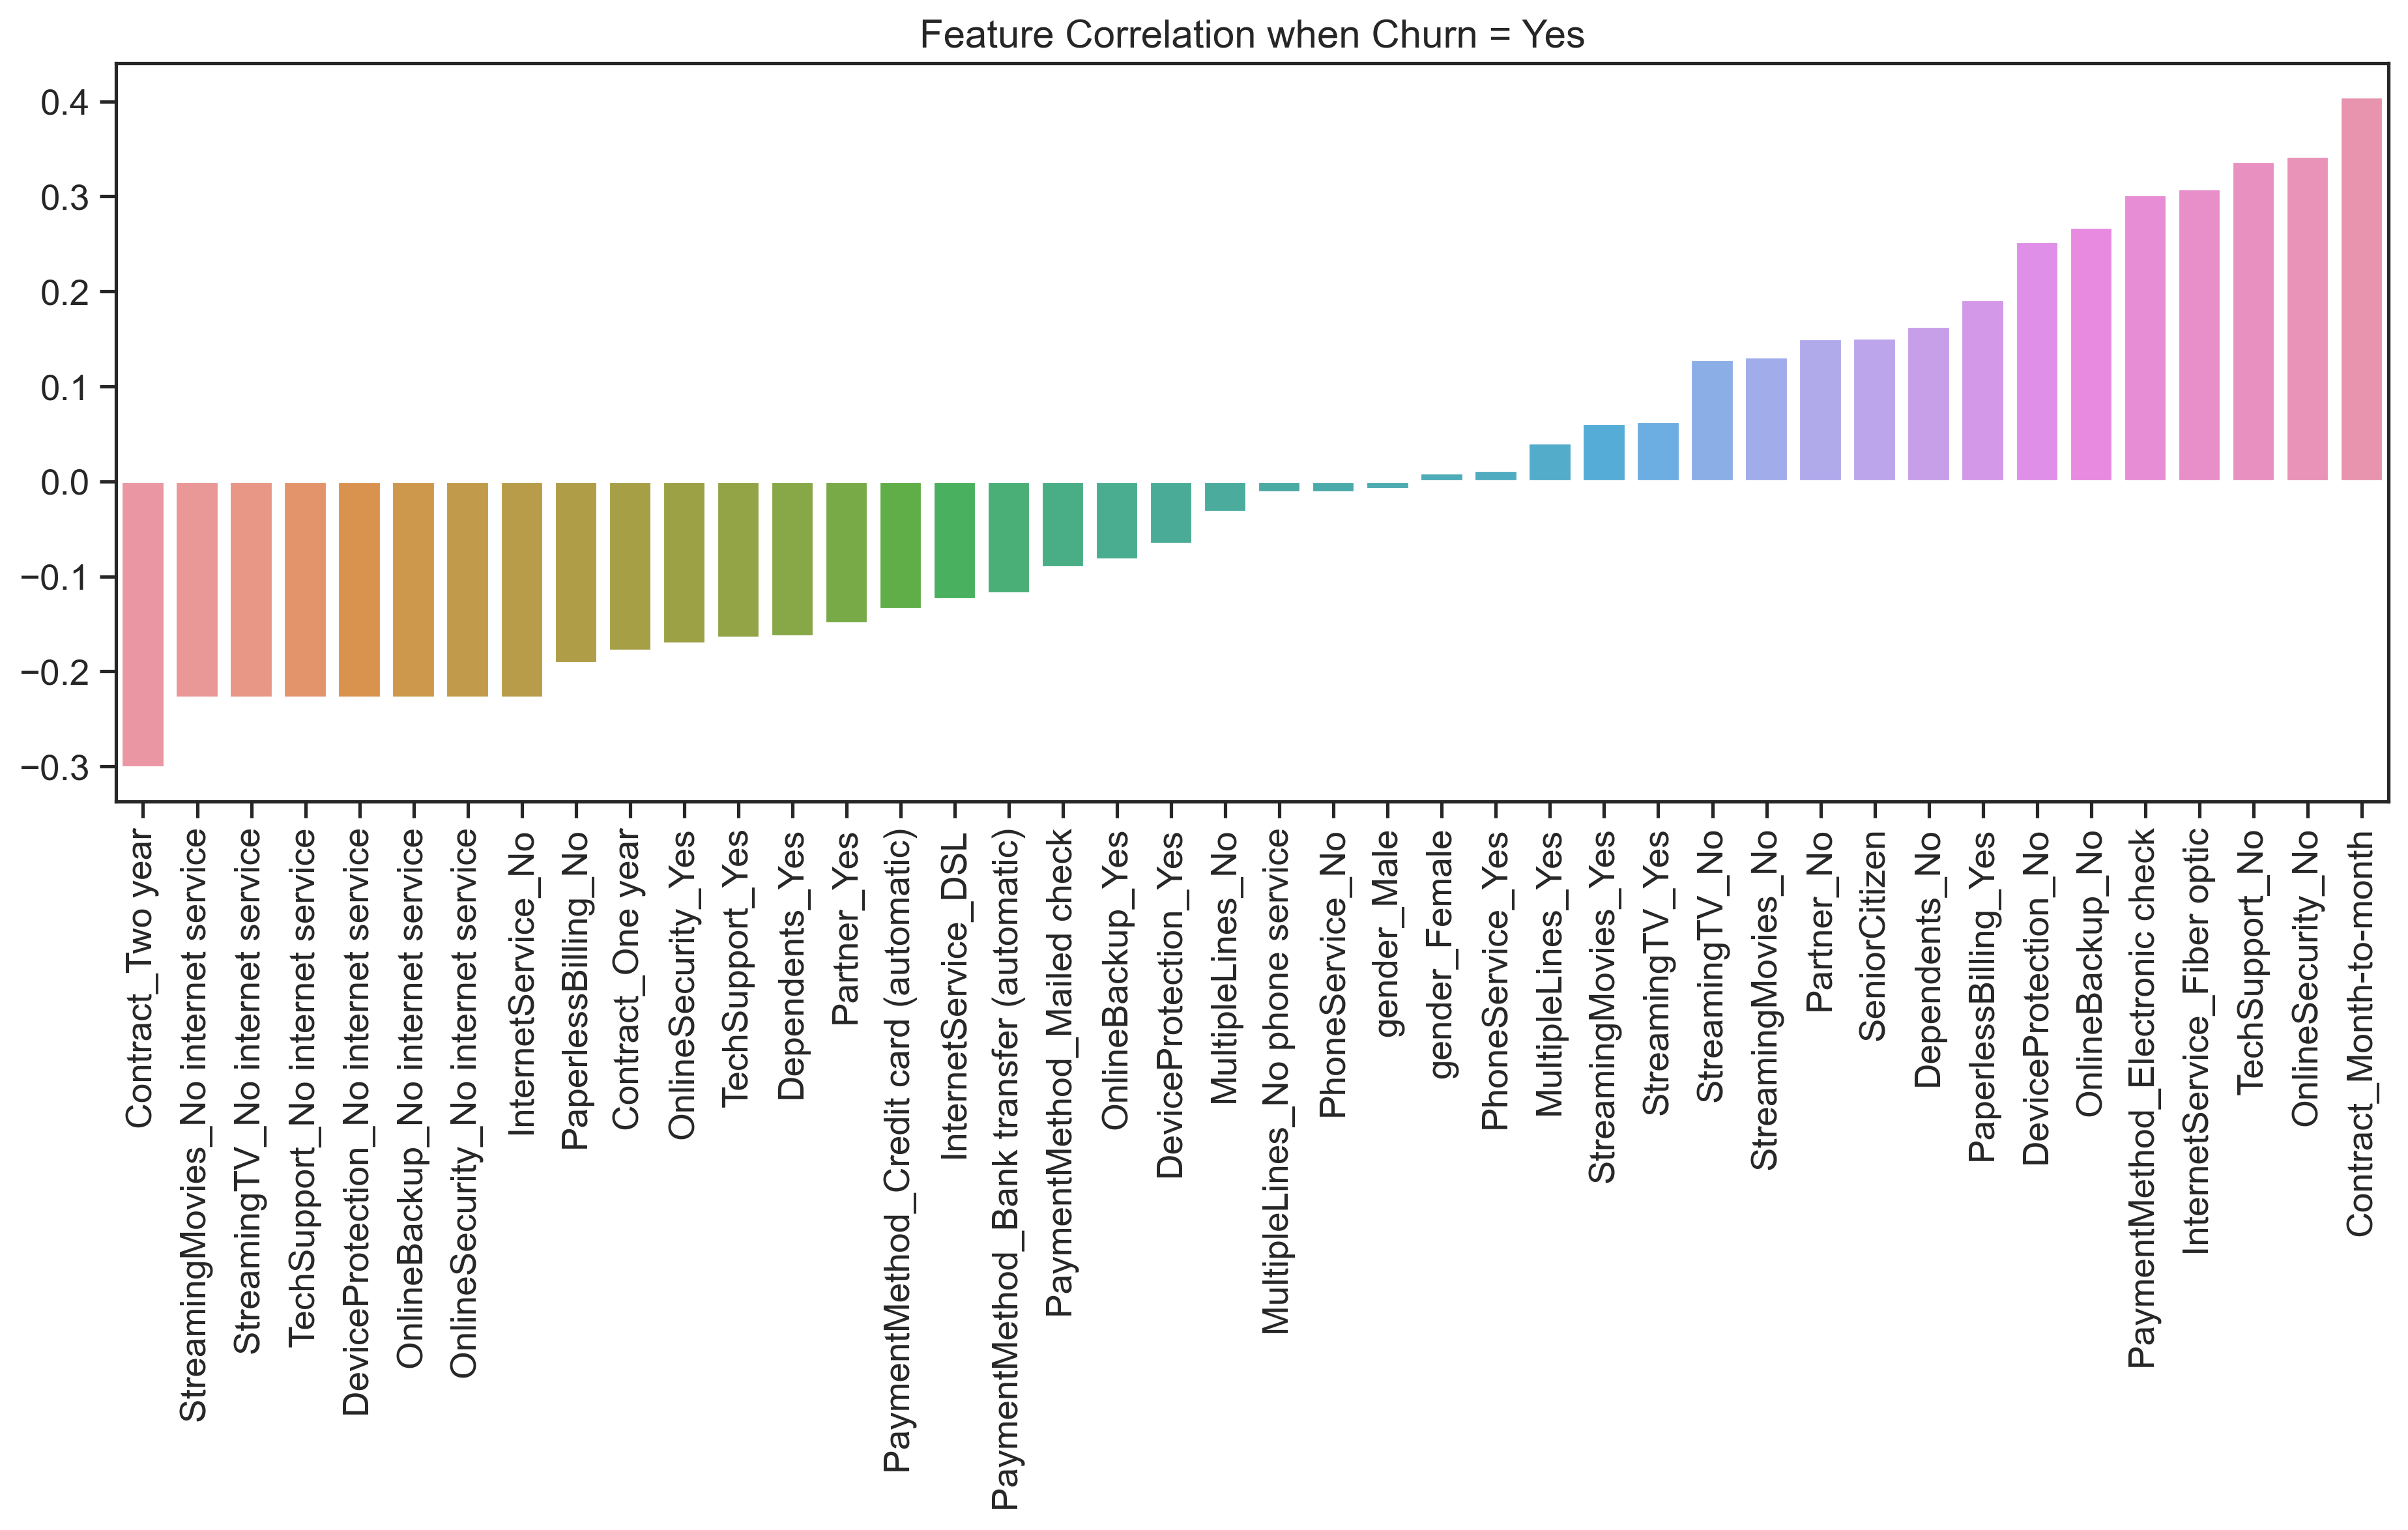

In [37]:
plt.figure(figsize=(15,5),dpi=300)
sn.barplot(x=df_corr['Churn_Yes'].sort_values().iloc[1:-1].index,y=df_corr['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature Correlation when Churn = Yes')
plt.xticks(rotation=90);

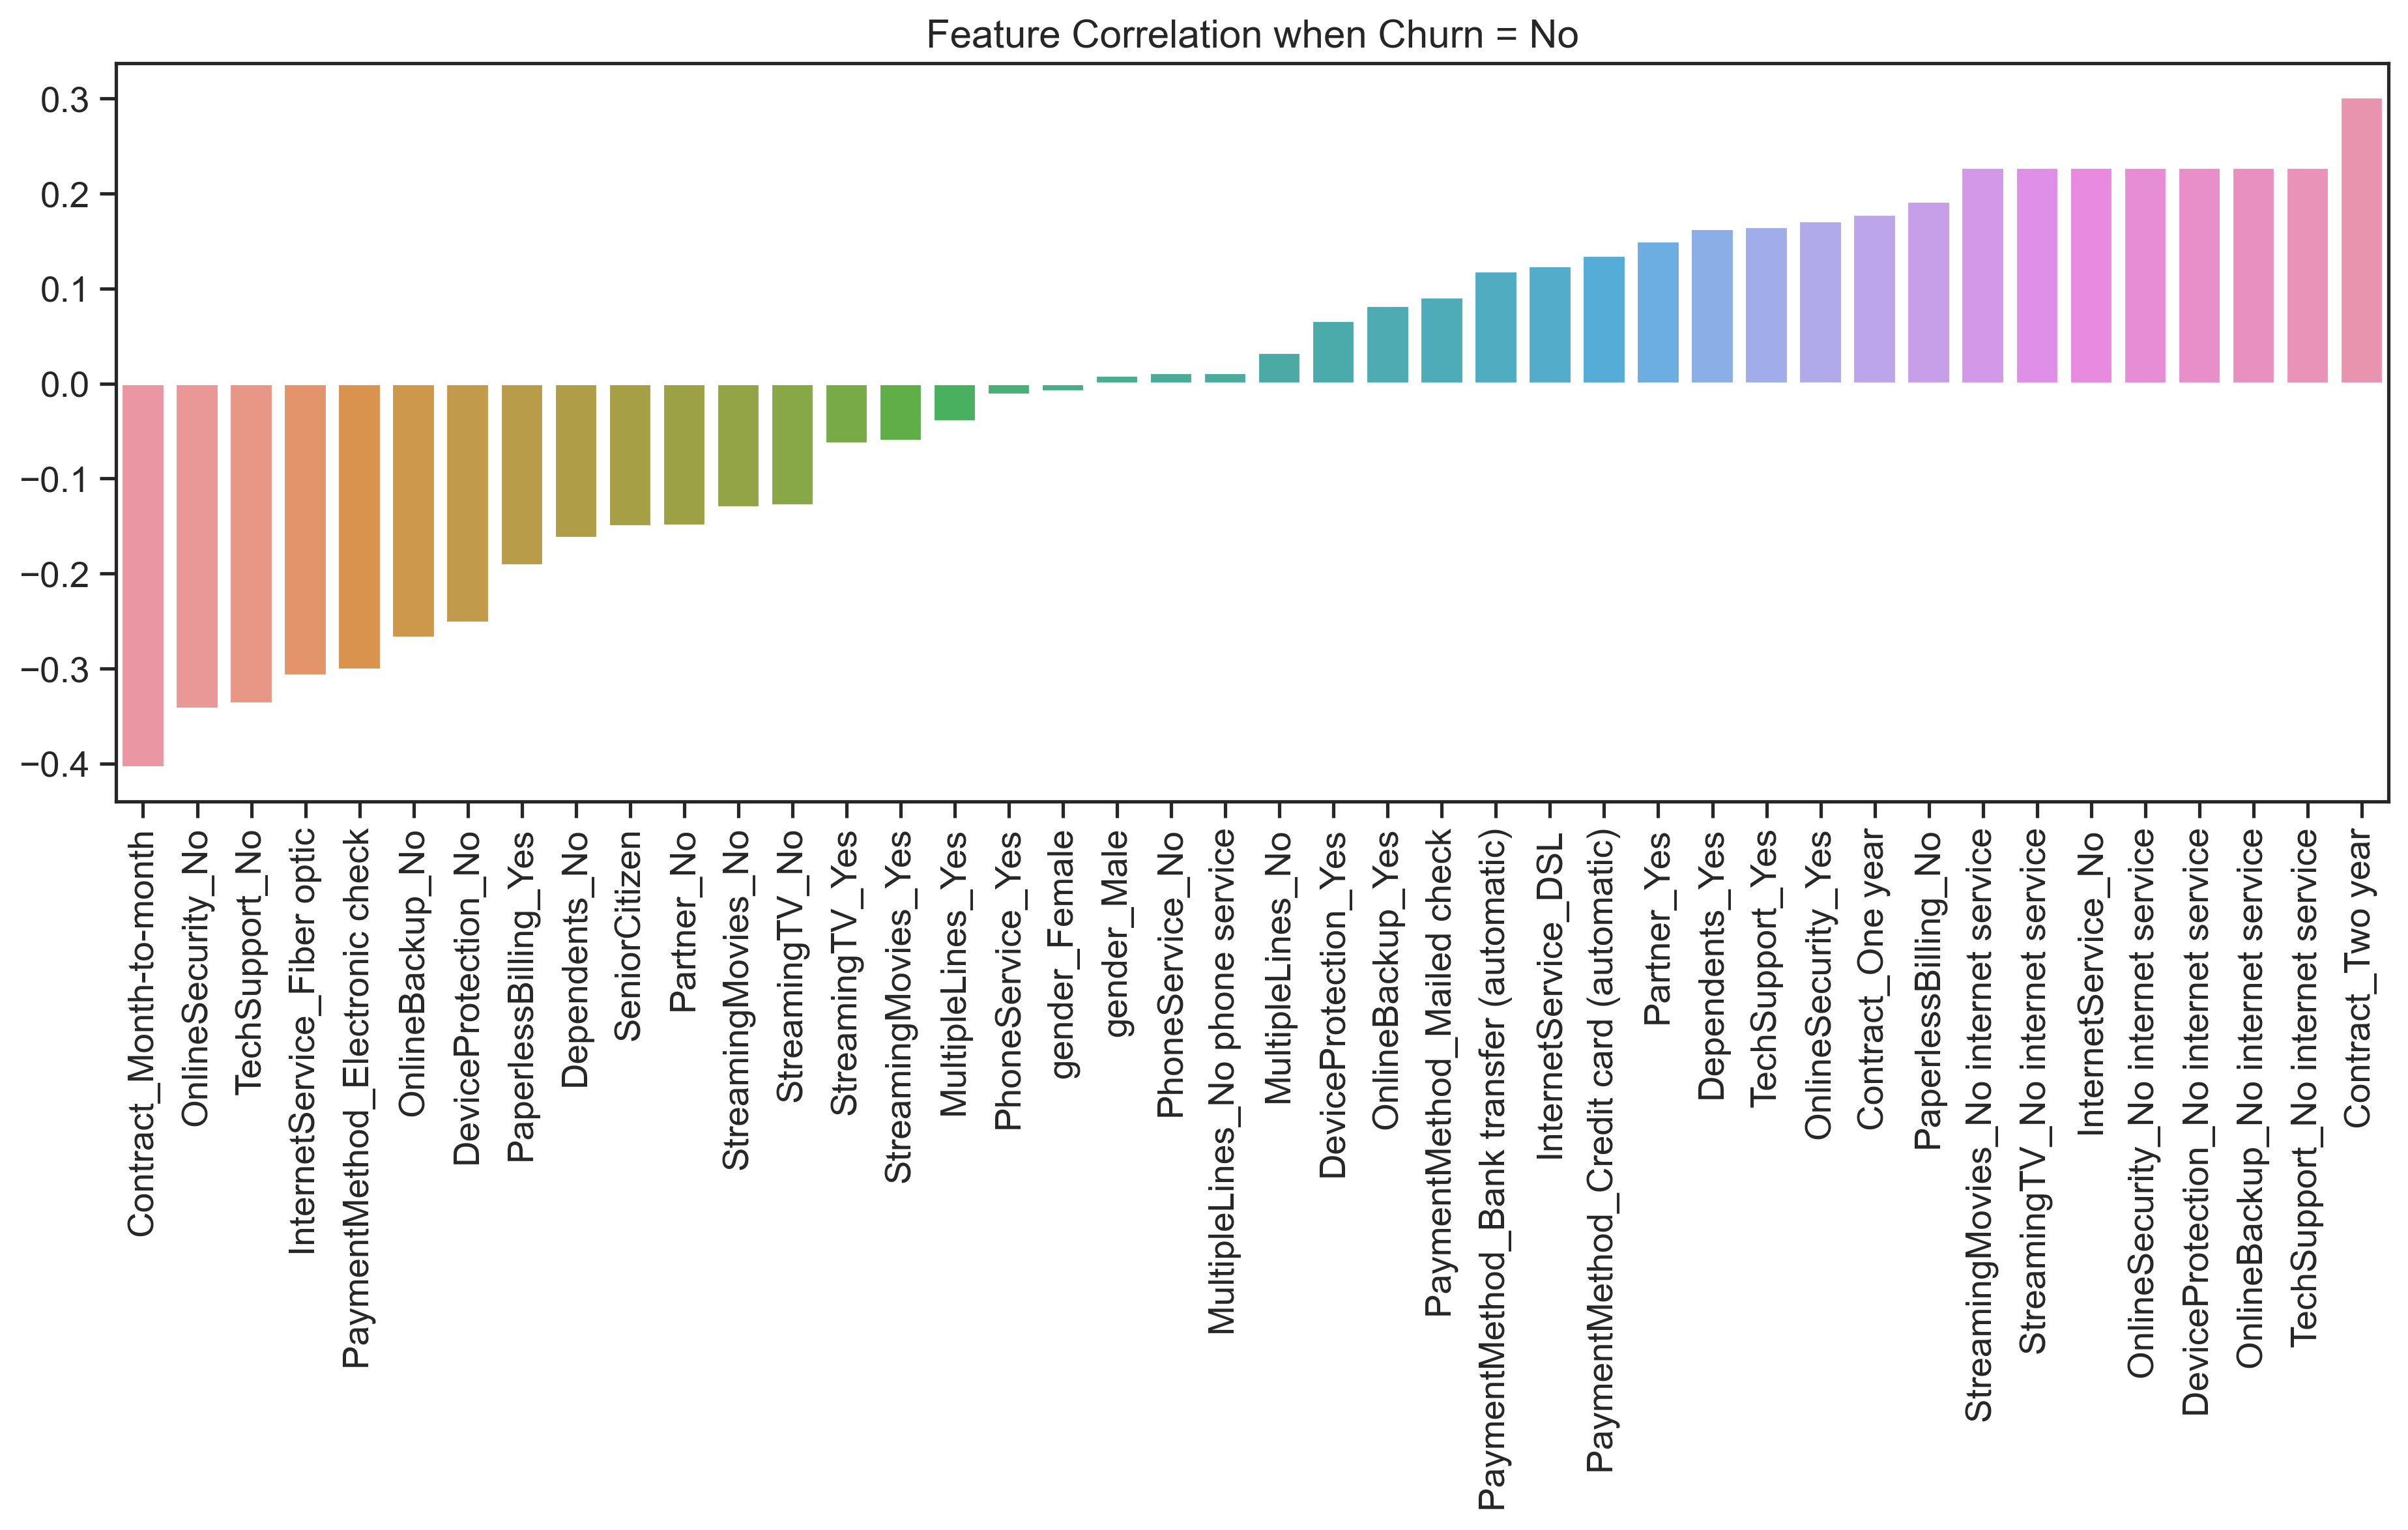

In [38]:
plt.figure(figsize=(15,5),dpi=300)
sn.barplot(x=df_corr['Churn_No'].sort_values().iloc[1:-1].index,y=df_corr['Churn_No'].sort_values().iloc[1:-1].values)
plt.title('Feature Correlation when Churn = No')
plt.xticks(rotation=90);

## Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [39]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [43]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [45]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [46]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [47]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [49]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [50]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [51]:
df.gender.unique()

array([1, 0], dtype=int64)

**One hot encoding for categorical columns**

In [52]:
df2 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [53]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4209,0,0,1,1,44,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
4251,1,0,1,1,24,0,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
973,0,1,1,0,44,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
457,1,0,1,1,30,1,0,0,1,1,...,1,0,0,0,0,1,1,0,0,0
1736,1,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [54]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [55]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [56]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Machine Learning Model 

In [122]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.neural_network import MLPClassifier

In [115]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

## Logistic Regression

In [116]:
model_logReg = LogisticRegression(C=200, max_iter=1000)

scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)
model_logReg.fit(X_train, y_train)

[0.57246377 0.58237548 0.57142857 0.69852941 0.60805861 0.60516605
 0.54761905 0.56326531 0.58426966 0.54347826]


LogisticRegression(C=200, max_iter=1000)

In [117]:
log_pred = model_logReg.predict(X_test)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

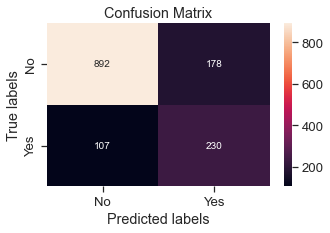

In [118]:
cm = confusion_matrix(log_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [119]:
print(classification_report(y_test, log_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86       999
         Yes       0.68      0.56      0.62       408

    accuracy                           0.80      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.79      0.80      0.79      1407



In [121]:
import numpy as np

def calculate_accuracy(cm):
    # Extract TP, TN, FP, FN from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    # Calculate accuracy
    accuracy = (tp + tn) / np.sum(cm)
    return accuracy

# Example usage within your code
cm = confusion_matrix(y_test, log_pred)
accuracy = calculate_accuracy(cm)
print(f"Calculated Accuracy: {accuracy:.4f}")


Calculated Accuracy: 0.7974


##  SVM 

In [96]:
model_svm = SVC(kernel='linear', C=20)
scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)

model_svm.fit(X_train, y_train)

[0.57246377 0.58237548 0.57142857 0.69852941 0.60805861 0.60516605
 0.54761905 0.56326531 0.58426966 0.54347826]


SVC(C=20, kernel='linear')

In [97]:
svm_pred = model_svm.predict(X_test)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

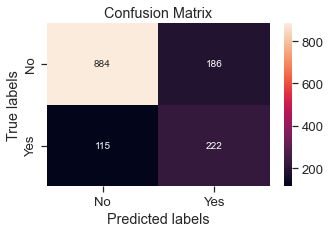

In [98]:
cm = confusion_matrix(svm_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [99]:
print(classification_report(y_test, svm_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.83      0.88      0.85       999
         Yes       0.66      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



## XG Boost 

In [100]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter tuning using GridSearchCV to maximize ROC-AUC
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [101]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [107]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
import xgboost as xgb

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [1.5, 2, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [4, 5, 8]
}

model_xgb = xgb.XGBClassifier(learning_rate=0.08, n_estimators=100, objective='binary:logistic', use_label_encoder=False, verbosity=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=5, scoring='roc_auc', 
                                   n_jobs=2, cv=skf, verbose=0, random_state=0)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best estimator
print(random_search.best_estimator_)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [108]:
xgb_pred = random_search.predict(X_test)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

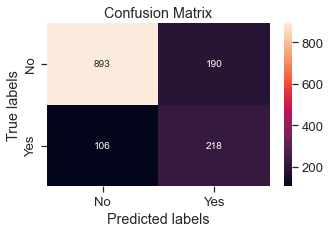

In [109]:
cm = confusion_matrix(xgb_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [110]:
print(classification_report(y_test, xgb_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.82      0.89      0.86       999
         Yes       0.67      0.53      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



**Train test split**

In [148]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [149]:
X_train.shape

(5625, 26)

In [150]:
X_test.shape

(1407, 26)

In [36]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [37]:
len(X_train.columns)

26

# Build a model (ANN) in tensorflow/keras

In [38]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4783 - accuracy: 0.7639
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.7938
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.7984
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8050
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8069
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8100
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4059 - accura

In [39]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7733


[0.48921629786491394, 0.7732764482498169]

In [40]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 866us/step


array([[0.21458219],
       [0.4289907 ],
       [0.03737664],
       [0.76819646],
       [0.4708262 ]], dtype=float32)

In [41]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [43]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [44]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       999
           1       0.62      0.58      0.60       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407



Text(69.0, 0.5, 'Truth')

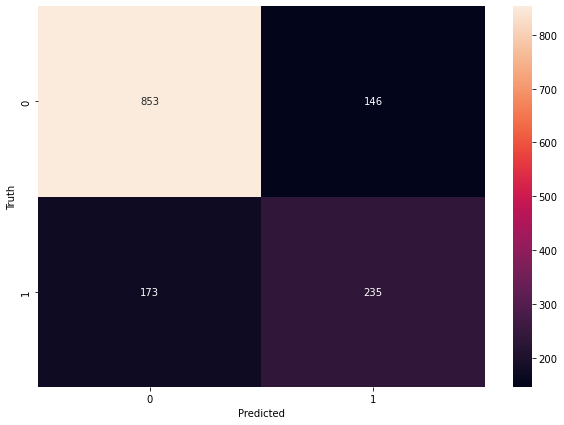

In [45]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
y_test.shape

(1407,)